$$ \text{LaTeX command declarations here.}
\newcommand{\R}{\mathbb{R}}
\renewcommand{\vec}[1]{\mathbf{#1}}
$$

# EECS 445:  Machine Learning
## Hands On 05:  Linear Regression II
* Instructor:  **Zhao Fu, Valli, Jacob Abernethy and Jia Deng**
* Date:  September 26, 2016

### Overfitting: Number of parameters

Exercise: 
* Which one is overfitting? 
* Which one is underfitting?
* Which one is probably the best fit?

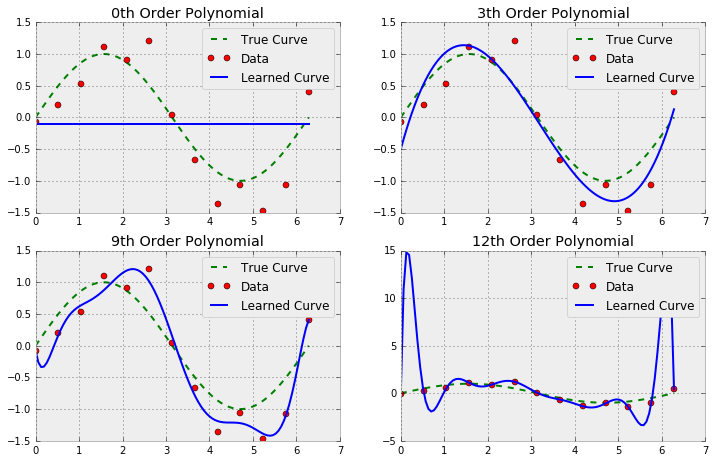

In [2]:
regression_overfitting_degree(degree0=0, degree1=3,degree2=9,degree3=12)

### Overfitting: Dataset Size

Exercise: 
* What can you do if both training error and test error are high?
* What if training error goes lower while test error goes higher?

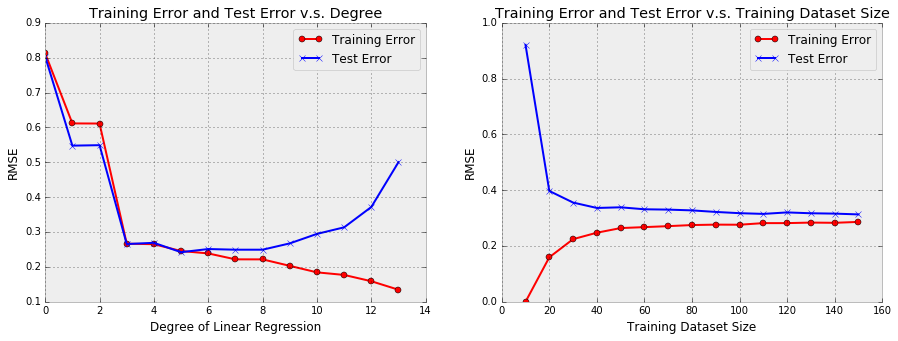

In [4]:
regression_overfitting_curve()

### Rule of Thumb to Choose the Degree
- For a small number of datapoints, use a low degree
    - Otherwise, the model will overfit!
- As you obtain more data, you can gradually increase the degree
    - Add more features to represent more data
    - **Warning:**  Your model is still limited by the finite amount of data available.  The optimal model for finite data cannot be an infinite-dimensional polynomial!)
- Use **regularization** to control model complexity.

## Regularized Linear Regression

### Regularized Least Squares: Objective Function

- Recall the objective function we minimizes in last lecture is 
$$
E(\vec{w}) = \frac12 \sum_{n=1}^N \left( \vec{w}^T \phi(\vec{x}_n) - t_n \right)^2
$$

- To penalize the large coefficients, we will add one penalization/regularization term to it and minimize them altogether.
$$
E(\vec{w}) = \underbrace{ \frac12 \sum_{n=1}^N \left( \vec{w}^T \phi(\vec{x}_n) - t_n \right)^2 }_{E_D(\vec{w})}+ \underbrace{\boxed{\frac{\lambda}{2} \left \| \vec{w} \right \|^2}}_{E_W(\vec{w})}
$$
of which $E_D(\vec{w})$ represents the term of sum of squared errors and $E_W(\vec{w})$ is the regularization term.

- $\lambda$ is the regularization coefficient. 
- If $\lambda$ is large, $E_{\vec{W}}(\vec{w})$ will dominate the objective function. As a result we will focus more on minimizing $E_W(\vec{w})$ and the resulting solution $\vec{w}$ tends to have smaller norm and the $E_D(\vec{w})$ term will be larger.

### Regularized Least Squares: Derivation
- Based on what we have derived in last lecture, we could write the objective function as
$$
\begin{aligned}
E(\vec{w}) 
&= \frac12 \sum_{n=1}^N \left( \vec{w}^T \phi(\vec{x}_n) - t_n \right)^2 + \frac{\lambda}{2} \left \| \vec{w} \right \|^2
\end{aligned}
$$

**Exercise**: Derive the gradient in element-wise to verify the above result, i.e. using $\phi(\vec{x}_n)_d$ and $w_d$ to represent $E(w_1, w_2, \dots, w_D)$ and derive $\frac{\partial E}{\partial w_d}$. Suppose $\phi(\vec{x_n}) \in \mathbb{R}^D$.

### Regularized Least Squares: Solution
- Based on what we have derived in last lecture, we could write the objective function as
$$
\begin{aligned}
E(\vec{w}) = \frac{1}{2}\sum_{n = 1}^{N}{(\sum_{d=1}^{D}{w_d\phi_d(\vec{x}_n)} - t_n)^2} + \frac{\lambda}{2}\sum_{d=1}^{D}{w_d^2} \\
\frac{\partial E}{\partial w_d} = \sum_{n = 1}^{N}{\phi_d(\vec{x}_n)(\sum_{d=1}^{D}{w_d\phi_d(\vec{x}_n)} - t_n)} + \lambda w_d \\
\frac{\partial E}{\partial w_d} = \sum_{n = 1}^{N}{\phi_d(\vec{x}_n)(\vec{w}^T\phi(\vec{x}_n) - t_n)} + \lambda w_d
\end{aligned}
$$

- The gradient is
$$
\begin{aligned}
\nabla_{\vec{w}} E(\vec{w}) 
&= \Phi^T \Phi \vec{w} - \Phi^T \vec{t} + \lambda \vec{w}\\
&= (\Phi^T \Phi + \lambda I)\vec{w} - \Phi^T \vec{t}
\end{aligned}
$$

- Setting the gradient to 0, we will get the solution
$$
\boxed{ \hat{\vec{w}}=(\Phi^T \Phi + \lambda I)^{-1} \Phi^T \vec{t} }
$$

### Regularized Least Squares: Closed Form

In the solution to ordinary least squares which is $\hat{\vec{w} }=(\Phi^T \Phi)^{-1} \Phi^T \vec{t}$, we cannot guarantee $\Phi^T \Phi$ is invertible. But in regularized least squares, if $\lambda > 0$, $\Phi^T \Phi + \lambda I$ is always invertible.

**Exercise**: To be invertible, a matrix needs to be full rank. Argue that $\Phi^T \Phi + \lambda I$ is full rank by characterizing its $p$ eigenvalues in terms of the singular values of $\Phi$ and $\lambda$.

### Solution:
Suppose $\Phi = U^T\Lambda V$ which is SVD of $\Phi$, we have $\Phi^T\Phi = V^T\Lambda^2V$. 

Then we have $(\Phi^T\Phi + \lambda I)V^T = V^T(\Lambda^2 + \lambda I)$. 

The $i^{th}$ eigenvalue of $(\Phi^T\Phi + \lambda I)$ is $\lambda_i^2 + \lambda > 0$ where $\lambda_i$ is the singular value for $\Phi$. 

Then $\det{(\Phi^T\Phi + \lambda I)} = \prod{(\lambda_i^2 + \lambda)} > 0$, which means $\Phi^T\Phi + \lambda I$ is invertable.

### Regularized Least Squares:  Different Norms
- The $\ell^p$ norm of a vector $\vec{x}$ is defined as
$$
\left \| \vec{x} \right \|_p = (\sum_{j=1}^{M} |x_j|^p)^\frac{1}{p}
$$

- For the regularized least squares above, we used $\ell^2$ norm. We could also use other $\ell^p$ norms for different regularizers and the objective function becomes
$$
E(\vec{w}) = \frac12 \sum_{n=1}^N \left( \vec{w}^T \phi(\vec{x}_n) - t_n \right)^2 + \frac{\lambda}{2} \left \| \vec{w} \right \|_p^p
$$

**Exercise**: Derive the element-wise gradient for the above $\ell^p$ norm regularized energy function.

### Regularized Least Squares:  Summary

- Simple modification of linear regression
- $\ell^2$ Regularization controls the tradeoff between *fitting error* and *complexity*.
    - Small $\ell^2$ regularization results in complex models, but with risk of overfitting
    - Large $\ell^2$ regularization results in simple models, but with risk of underfitting
- It is important to find an optimal regularization that *balances* between the two

## Probablistic Interpretation of Least Squares Regression
- We have showed derived the solution to least squares regression by minimizing objective function. Now we will provide a probablistic perspective. Specifically, we will show the solution to **regular least squares** is just the **maximum likelihood** estimate of $\vec{w}$ and the solution to **regularized least squares** is the **Maximum a Posteriori** estimate. 

### Some Background
- Gaussian Distribution
$$ 
\mathcal{N}(x, \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left[ \frac{(x-\mu)^2}{2\sigma^2} \right]
$$

- **Maximum Likelihood Estimation** and **Maximum a Posteriori Estimation (MAP)**
    - For distribution $t \sim p(t|\theta)$. $\theta$ is some unknown parameter (like mean or variance) to be estimated.
    - Given observation $\vec{t} = (t_1, t_2, \dots, t_N)$, 
        - The Maximum Likelihood Estimator is
        $$
        \theta_{ML} = \arg \max \prod_{n=1}^N p(t_n | \theta)
        $$
        - If we have some prior knowledge about $\theta$, the MAP estimator is 
        $$
        \theta_{MAP} = \arg \max \prod_{n=1}^N p(\theta | t_n) \quad (\text{Posteriori Probability of } \theta)
        $$        

### Maximum Likelihood Estimator $\vec{w}_{ML}$

- We assume the **signal+noise** model of single data $(\vec{x}, t)$ is
    $$
    \begin{gathered}
    t = \vec{w}^T \phi(\vec{x}) + \epsilon \\ 
    \epsilon \sim \mathcal{N}(0, \beta^{-1})
    \end{gathered}
    $$
    of which $\vec{w}^T \phi(\vec{x})$ is the true model, $\epsilon$ is the perturbation/randomness.

- Since $\vec{w}^T \phi(\vec{x})$ is deterministic/non-random, we have
    $$
    t \sim \mathcal{N}(\vec{w}^T \phi(\vec{x}), \beta^{-1})
    $$
    
**Exercise**: 
* Derive the likelihood function for a single data $p(t_n|\vec{x}_n,\vec{w},\beta)$.
* Derive the complete log likelihood function for the whole dataset $\ln p(\vec{t}|\mathcal{X},\vec{w},\beta)$.
* Using maximum likelihood to estimate parameter $\vec{w}$.

### Maximum Likelihood Estimator $\vec{w}_{ML}$
    
- The **likelihood function** of $t$ is just **probability density function (PDF)** of $t$
    $$
    p(t|\vec{x},\vec{w},\beta) = \mathcal{N}(t|\vec{w}^T \phi(\vec{x}),\beta^{-1})
    $$
    
- For inputs $\mathcal{X}=(\vec{x}_1, \dots, \vec{x}_n)$ and target values $\vec{t}=(t_1,\dots,t_n)$, the data likelihood is
    $$
    p(\vec{t}|\mathcal{X},\vec{w},\beta)
    = \prod_{n=1}^N p(t_n|\vec{x}_n,\vec{w},\beta)
    = \prod_{n=1}^N \mathcal{N}(t_n|\vec{w}^T\phi(\vec{x}_n),\beta^{-1})
    $$
    
- **Notation Clarification** 
    - $p(t|x,w,\beta)$ it the PDF of $t$ whose distribution is parameterized by $x,\vec{w},\beta$. 
    - $\mathcal{N}(\vec{w}^T \phi(\vec{x}), \beta^{-1})$ is Gaussian distribution with **mean** $\vec{w}^T \phi(\vec{x})$ and **variance** $\beta^{-1}$.
    - $\mathcal{N}(t|\vec{w}^T \phi(\vec{x}),\beta^{-1})$ is the PDF of $\vec{t}$ which has Gaussian distribution $\mathcal{N}(\vec{w}^T \phi(\vec{x}), \beta^{-1})$

### Maximum Likelihood Estimator $\vec{w}_{ML}$: Derivation
- Single data likelihood is
    $$
    p(t_n|\vec{x}_n,\vec{w},\beta) 
    = \mathcal{N}(t_n|\vec{w}^T\phi(\vec{x}_n),\beta^{-1})
    = \frac{1}{\sqrt{2 \pi \beta^{-1}}} \exp \left \{ - \frac{1}{2 \beta^{-1}} (t_n - \vec{w}^T \phi(x_n))^2 \right \}
    $$

- Single data log-likelihood is 
    $$
    \ln p(t_n|\vec{x}_n,\vec{w},\beta) = - \frac12 \ln 2 \pi \beta^{-1} - \frac{\beta}{2} (\vec{w}^T \phi(x_n) - t_n)^2
    $$
    We use logarithm because maximizer of $f(x)$ is the same as maximizer of $\log f(x)$. Logarithm can convert product to summation which makes life easier.

- Complete data log-likelohood is
    $$
    \begin{aligned}
    \ln p(\vec{t}|\mathcal{X},\vec{w},\beta) 
    &= \ln \left[ \prod_{n=1}^N p(t_n|\vec{x}_n,\vec{w},\beta) \right] = \sum_{n=1}^N \ln p(t_n|\vec{x}_n,\vec{w},\beta) \\
    &= \sum_{n=1}^N \left[ - \frac12 \ln 2 \pi \beta^{-1} - \frac{\beta}{2} (\vec{w}^T \phi(x_n) - t_n)^2 \right]
    \end{aligned}
    $$


- Maximum likelihood estimate $\vec{w}_{ML}$ is
    $$
    \begin{aligned}
    \vec{w}_{ML} 
    &= \underset{\vec{w}}{\arg \max} \ln p(\vec{t}|\mathcal{X},\vec{w},\beta) \\
    &= \underset{\vec{w}}{\arg \max}  \sum_{n=1}^N \left[ - \frac12 \ln 2 \pi \beta^{-1} - \frac{\beta}{2} (\vec{w}^T \phi(x_n) - t_n)^2 \right] \\
    &= \underset{\vec{w}}{\arg \max}  \sum_{n=1}^N \left[ - \frac{\beta}{2} (\vec{w}^T \phi(x_n) - t_n)^2 \right] \\
    &= \underset{\vec{w}}{\arg \min}  \sum_{n=1}^N \left[(\vec{w}^T \phi(x_n) - t_n)^2 \right]
    \end{aligned}
    $$

- Familiar? Recall the objective function we minimized in least squares is $E(\vec{w}) = \frac12 \sum_{n=1}^N \left( \vec{w}^T \phi(\vec{x}_n) - t_n \right)^2$, so we could conclude that
    $$
    \boxed{\vec{w}_{ML}  = \hat{\vec{w}}_{LS} = \Phi^\dagger \vec{t}}
    $$

### MAP Estimator $\vec{w}_{MAP}$
- The **MAP estimator** is obtained by
    $$
    \begin{aligned}
    \vec{w}_{MAP} 
    &= \arg \max p(\vec{w}|\vec{t}, \mathcal{X},\beta) & & (\text{Posteriori Probability})\\
    &= \arg \max \frac{p(\vec{w}, \vec{t}, \mathcal{X},\beta)}{p(\mathcal{X}, t, \beta)} \\
    &= \arg \max \frac{p(\vec{t}|\vec{w}, \mathcal{X},\beta) p(\vec{w}, \mathcal{X}, \beta)}{p(\mathcal{X}, t, \beta)} \\
    &= \arg \max p(\vec{t}|\vec{w}, \mathcal{X},\beta) p(\vec{w}, \mathcal{X}, \beta) & & (p(X, t, \beta) \text{ is irrelevant to} \ \vec{w})\\
    &= \arg \max p(\vec{t}|\vec{w}, \mathcal{X},\beta) p(\vec{w}) p(\mathcal{X}) p(\beta) & & (\text{Independence}) \\
    &= \arg \max p(\vec{t}|\vec{w}, \mathcal{X},\beta) p(\vec{w}) & & (\text{Likelihood} \times \text{Prior})
    \end{aligned}
    $$
    We are just using **Bayes Theorem** for the above steps.
- The only difference from ML estimator is we have an extra term of PDF of $\vec{w}$. This is the **prior belief** of $\vec{w}$. Here, we assume, 
    $$
    \vec{w} \sim \mathcal{N}(\vec{0}, \alpha^{-1}I) 
    $$
    
**Exercise**: Derive the MAP Estimator of $\vec{w}$ and compare the solution with regularized linear regression. What is $\lambda$ in this case?

### MAP Estimator $\vec{w}_{MAP}$: Derivation
- $\vec{w} \sim \mathcal{N}(\vec{0}, \alpha^{-1}I)$ is **multivariate Gaussian** which has PDF
    $$
    p(\vec{w}) = \frac{1}{\left( \sqrt{2 \pi \alpha^{-1}} \right)^N} \exp \left \{ -\frac{1}{2 \alpha^{-1}} \sum_{n=1}^N w_n^2 \right \}
    $$

- So the MAP estimator is 
    $$
    \begin{aligned}
     \vec{w}_{MAP} 
     &= \underset{\vec{w}}{\arg \max} \ p(\vec{t}|\vec{w}, \mathcal{X},\beta) p(\vec{w}) = \underset{\vec{w}}{\arg \max} \left[\ln p(\vec{t}|\vec{w}, \mathcal{X},\beta) + \ln p(\vec{w}) \right] \\
     &= \underset{\vec{w}}{\arg \min} \left[ \sum_{n=1}^N \frac{\beta}{2} (\vec{w}^T \phi(x_n) - t_n)^2  +  \frac{\alpha}{2} \sum_{n=1}^N w_n^2 \right] \\
     &= \underset{\vec{w}}{\arg \min} \left[ \sum_{n=1}^N \frac12 (\vec{w}^T \phi(x_n) - t_n)^2  +  \frac12 \frac{\alpha}{\beta} \left \| \vec{w} \right \|^2 \right]
    \end{aligned}
    $$
    
- Exactly the objective in regularized least squares! So
$$
\boxed{ \vec{w}_{MAP} = \hat{\vec{w}}=\left(\Phi^T \Phi + \frac{\alpha}{\beta} I\right)^{-1} \Phi^T \vec{t} }
$$

- Compared with $\ell^2$ norm regularized least square, we have $\lambda = \frac{\alpha}{\beta}$.

- ML vs. MAP
    - Maximum Likelihood: We know **nothing** about $\vec{w}$ initially and every $\vec{w}$ are equally likelihood
    - Maximum a Posteriori: We know **something** about about $\vec{w}$ initially and certain $\vec{w}$ are more likely (depending on **prior** $p(\vec{w})$). In another way, $\vec{w}$ are weighted.
- Assumption $\vec{w} \sim \mathcal{N}(\vec{0}, \alpha^{-1}I)$ makes sense because
    - In **regularized least squares**
        - We already know large coefficient $\vec{w}$ that may lead to overfitting should be avoided. 
        - When we increase the regularization coefficient $\lambda$, the smaller $\left \| \vec{w} \right \|$ will be.
    - When use $\vec{w} \sim \mathcal{N}(\vec{0}, \alpha^{-1}I)$
        - $\vec{w} \sim \mathcal{N}(\vec{0}, \alpha^{-1}I)$ encodes the assumption that $\vec{w}$ with a smaller norm $\left \| \vec{w} \right \|$ is more "likely" than a $\vec{w}$ with a bigger norm.
        - When we increase $\alpha$, variance is smaller, small $\left \| \vec{w} \right \|$ will be much more likely
        